In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('C:\Projects\JupyterNotebook\Datern-Summer-Course-Dataset\Datern-Summer-Course-Dataset.csv', parse_dates=['Date'], dayfirst=True)


#df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y-')
#df['Date'] = df['Date'].dt.date

df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M' ).dt.hour


# df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M' ).dt.time



In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     1000 non-null   object        
 1   Branch                 1000 non-null   object        
 2   City                   1000 non-null   object        
 3   Member                 1000 non-null   object        
 4   Product Category       1000 non-null   object        
 5   Unit price             1000 non-null   float64       
 6   Quantity               1000 non-null   int64         
 7   VAT                    1000 non-null   float64       
 8   Total                  1000 non-null   float64       
 9   Date                   1000 non-null   datetime64[ns]
 10  Time                   1000 non-null   int64         
 11  Payment                1000 non-null   object        
 12  gross margin %         1000 non-null   float64       
 13  Cust

In [40]:
df.head()

,ID,Branch,City,Member,Product Category,Unit price,Quantity,VAT,Total,Date,Time,Payment,gross margin %,Customer Satisfaction
0,750-67-8428,A,Manchester,Member,Health and beauty,74.69,7,104.566,627.396,2019-01-05,13,Ewallet,5.6,9.1
1,226-31-3081,C,Leeds,Normal,Electronic accessories,15.28,5,15.280,91.680,2019-03-08,10,Cash,5.6,9.6
2,631-41-3108,A,Manchester,Normal,Home and lifestyle,46.33,7,64.862,389.172,2019-03-03,13,Credit card,5.6,7.4
3,123-19-1176,A,Manchester,Member,Health and beauty,58.22,8,93.152,558.912,2019-01-27,20,Ewallet,5.6,NaN
4,373-73-7910,A,Manchester,Normal,Sports and travel,86.31,7,120.834,725.004,2019-02-08,10,Ewallet,5.6,5.3


<AxesSubplot:xlabel='City', ylabel='Total_Sales'>

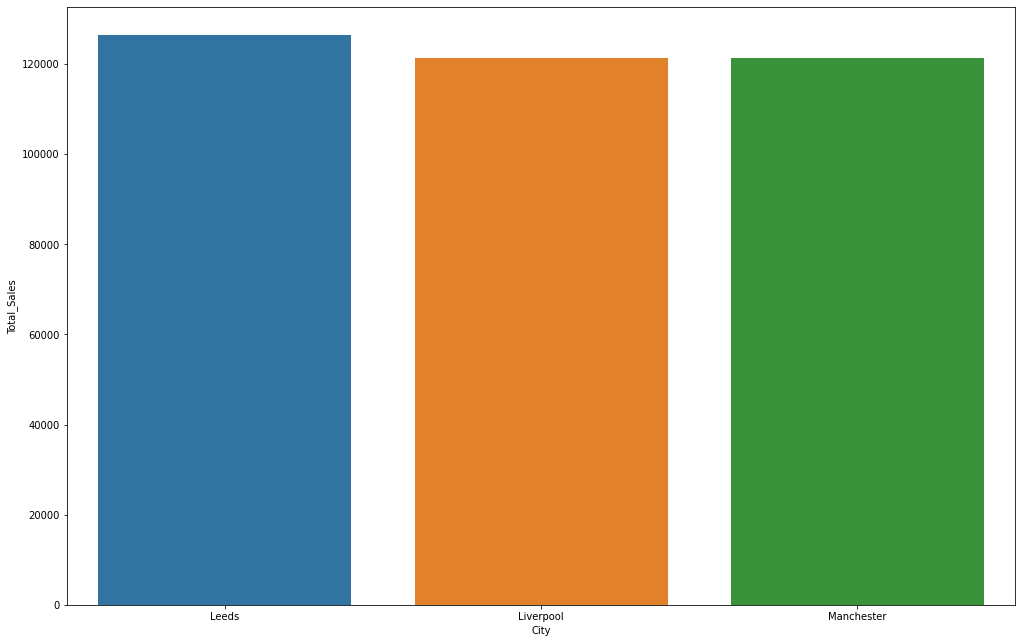

In [5]:
City_Sales =df.groupby('City').agg(Total_Sales =("Total",'sum'))
City_Sales = City_Sales.reset_index()
plt.figure(figsize=(17, 11))
sns.barplot(x="City",
           y="Total_Sales",           
           data=City_Sales)

In [73]:
City_Sales

,City,Total_Sales
0,Leeds,126364.236
1,Liverpool,121368.768
2,Manchester,121371.852


<AxesSubplot:xlabel='Product Category', ylabel='Total_Sales'>

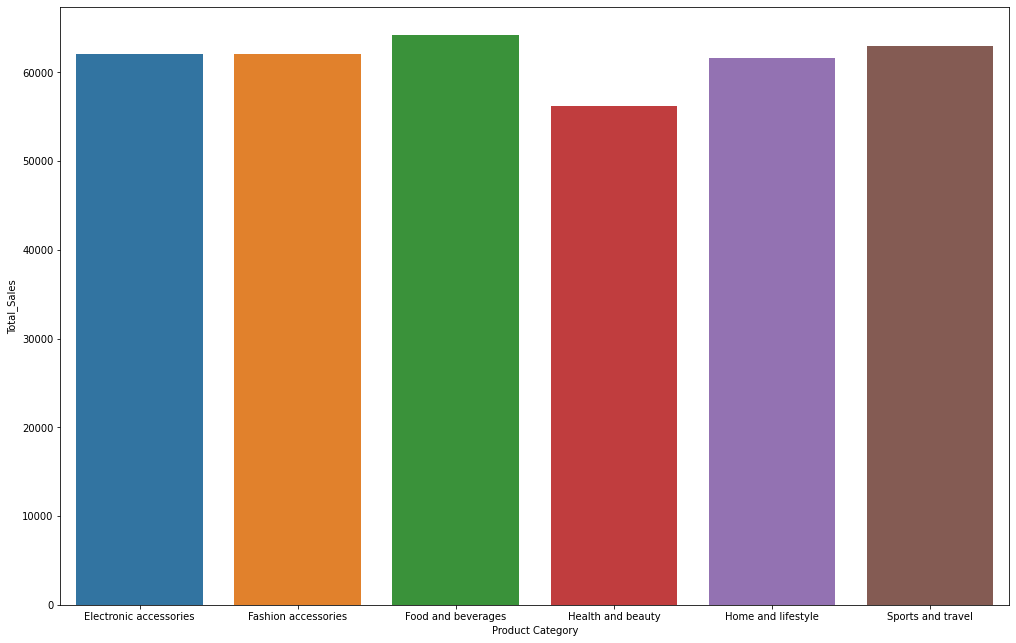

In [6]:
Product_Sales =df.groupby('Product Category').agg(Total_Sales =("Total",'sum'))
Product_Sales = Product_Sales.reset_index()
plt.figure(figsize=(17, 11))
sns.barplot(x="Product Category",
           y="Total_Sales",           
           data=Product_Sales)

<AxesSubplot:xlabel='City', ylabel='Total_Sales'>

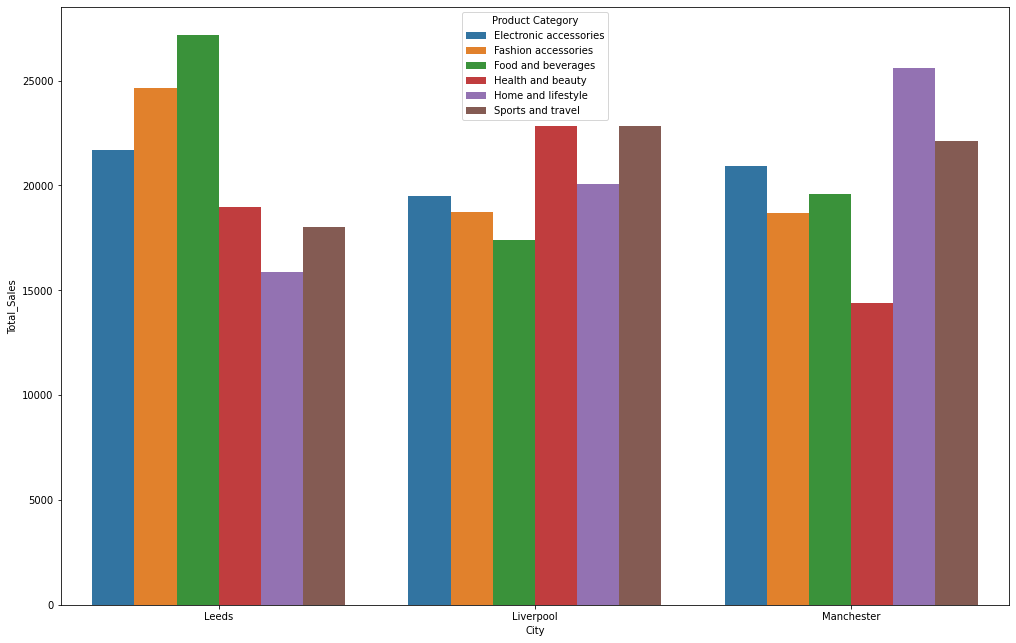

In [7]:
City_PC_Sales =df.groupby(['City','Product Category']).agg(Total_Sales =("Total",'sum'))
City_PC_Sales = City_PC_Sales.reset_index()
%matplotlib inline
plt.figure(figsize=(17, 11))

sns.barplot(x="City",
           y="Total_Sales",
           hue="Product Category",
           data=City_PC_Sales)


<AxesSubplot:xlabel='City', ylabel='Total_Sales'>

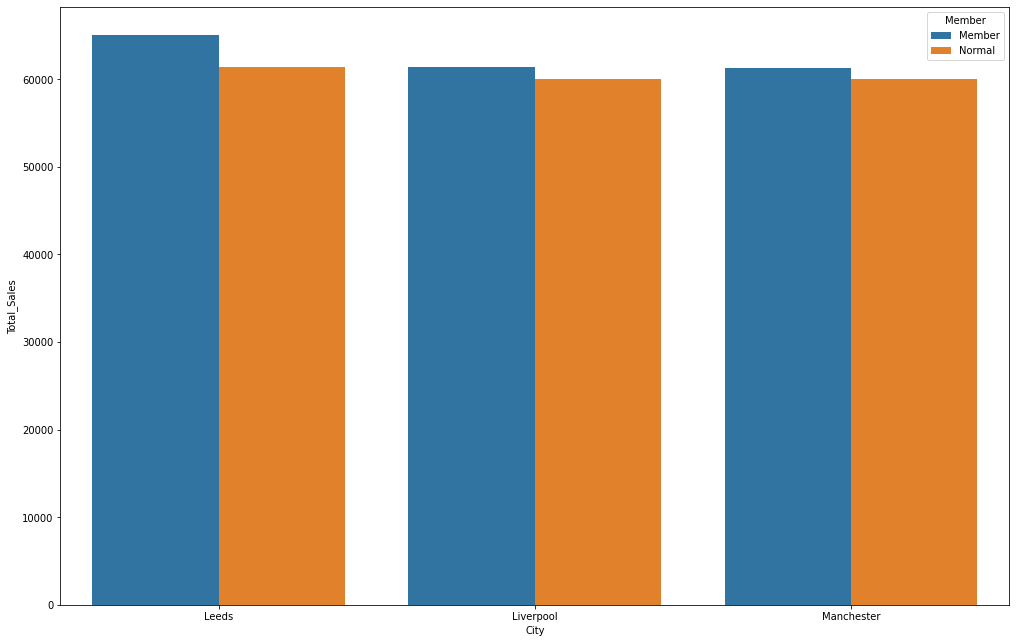

In [8]:
City_Member_Sales =df.groupby(['City','Member']).agg(Total_Sales =("Total",'sum'))
City_Member_Sales = City_Member_Sales.reset_index()
%matplotlib inline
plt.figure(figsize=(17, 11))

sns.barplot(x="City",
           y="Total_Sales",
           hue="Member",
           data=City_Member_Sales)

<AxesSubplot:xlabel='Payment', ylabel='Total_Sales'>

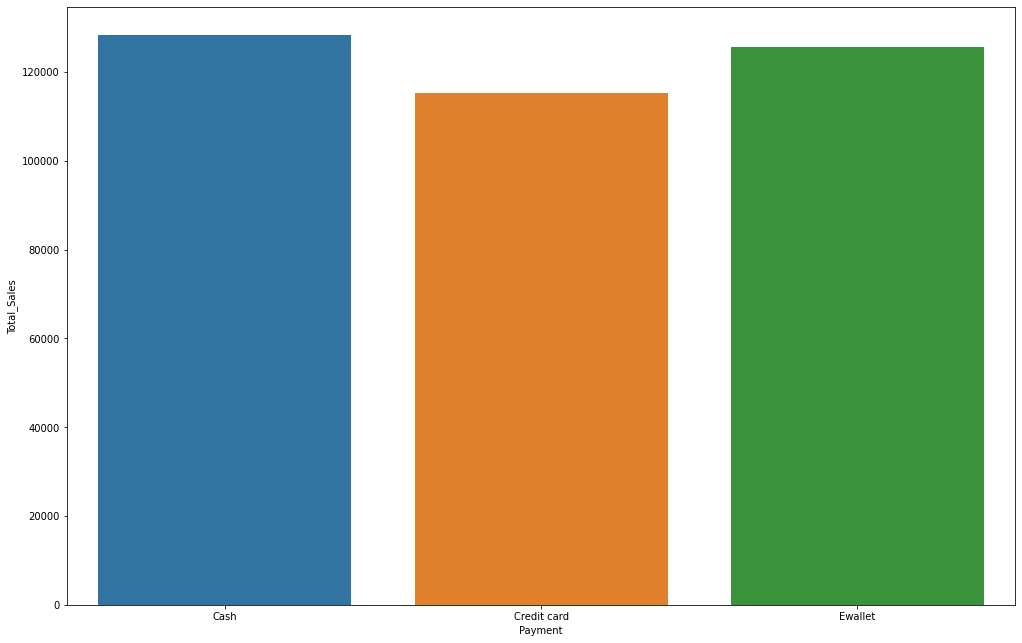

In [9]:
Payment_Mode =df.groupby('Payment').agg(Total_Sales =("Total",'sum'))
Payment_Mode = Payment_Mode.reset_index()
%matplotlib inline
plt.figure(figsize=(17, 11))

sns.barplot(x="Payment",
           y="Total_Sales",  
           data=Payment_Mode)


<AxesSubplot:xlabel='City', ylabel='Total_Sales'>

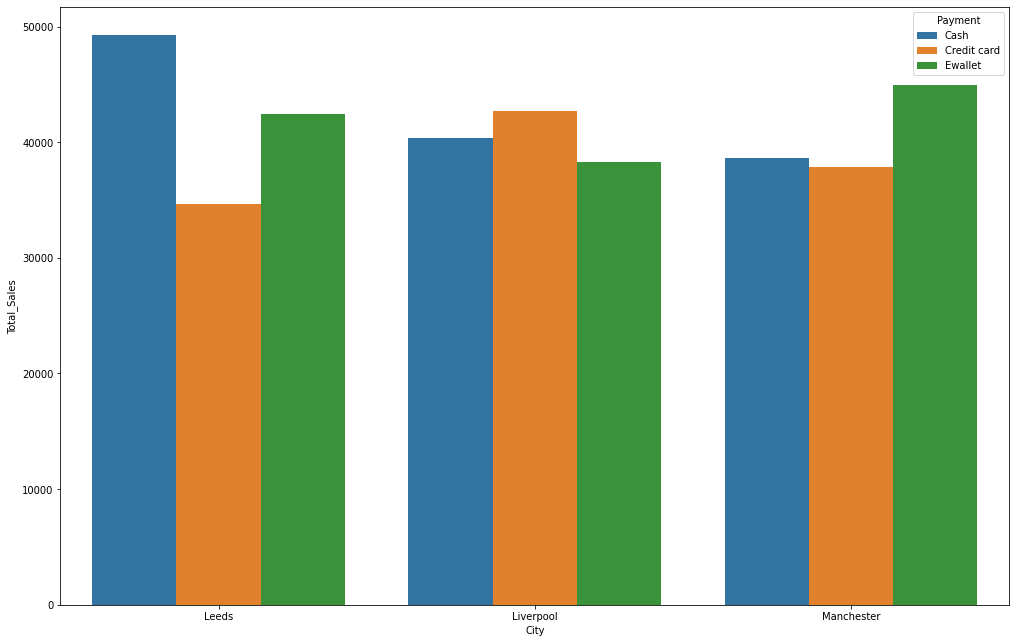

In [10]:
City_Payment_Mode =df.groupby(['City','Payment']).agg(Total_Sales =("Total",'sum'))
City_Payment_Mode = City_Payment_Mode.reset_index()
%matplotlib inline
plt.figure(figsize=(17, 11))

sns.barplot(x="City",
           y="Total_Sales", 
           hue="Payment", 
           data=City_Payment_Mode)


<AxesSubplot:xlabel='Time', ylabel='Total_Sales'>

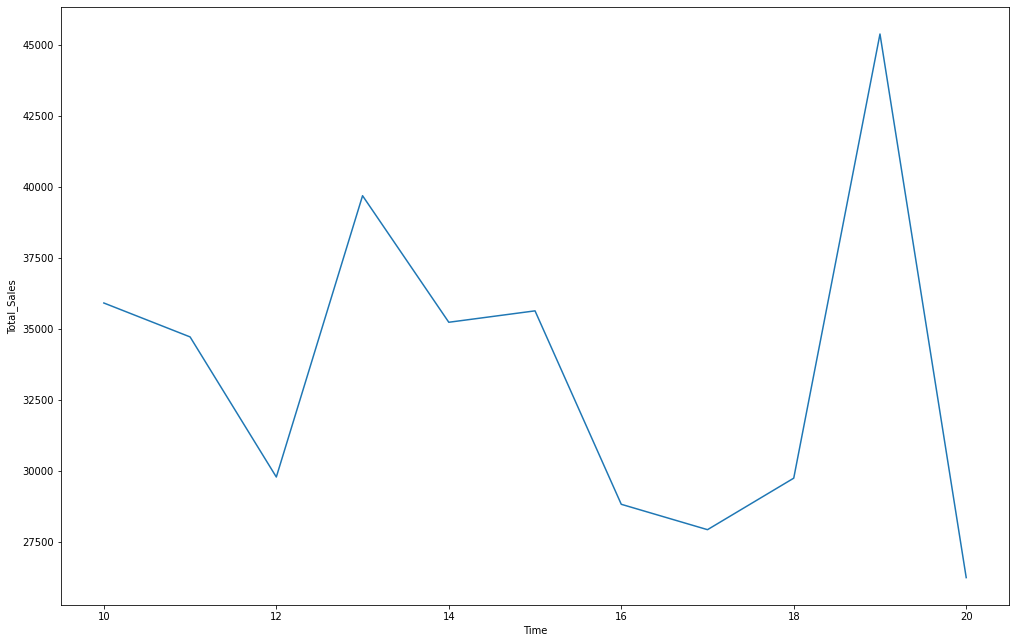

In [11]:

Time_Sales =df.groupby('Time').agg(Total_Sales =("Total",'sum'))
Time_Sales = Time_Sales.reset_index()
%matplotlib inline
plt.figure(figsize=(17, 11))


sns.lineplot(x="Time",
           y="Total_Sales", 
           data=Time_Sales)




<AxesSubplot:xlabel='Time', ylabel='Customers'>

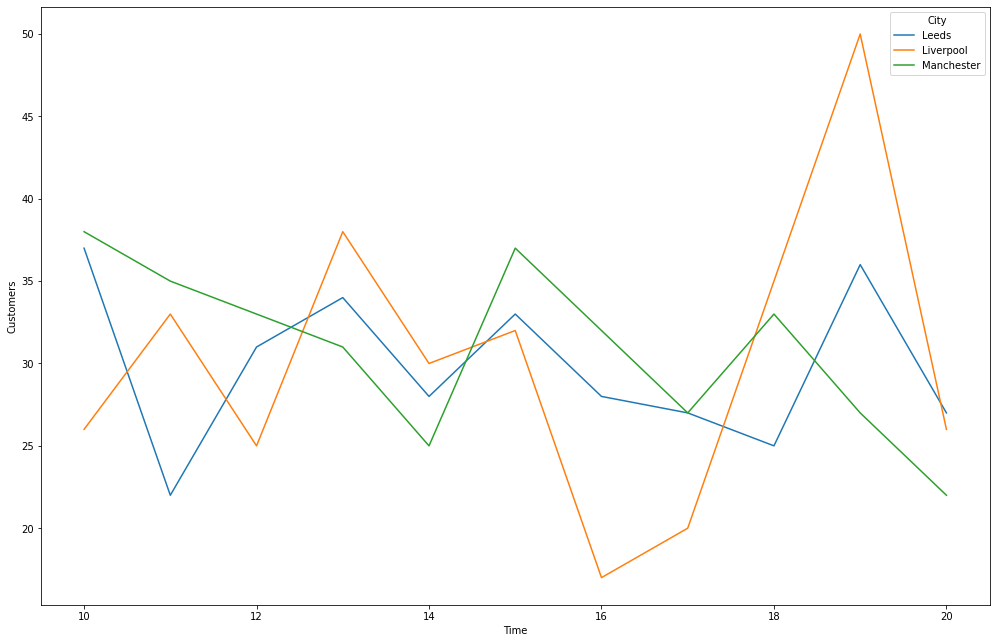

In [12]:
Time_Sales =df.groupby(['City','Time']).agg(Customers =("ID",'count'))
Time_Sales = Time_Sales.reset_index()
%matplotlib inline
plt.figure(figsize=(17, 11))


sns.lineplot(x="Time",
           y="Customers", 
           hue='City',
           data=Time_Sales)


<AxesSubplot:xlabel='Time', ylabel='Sales'>

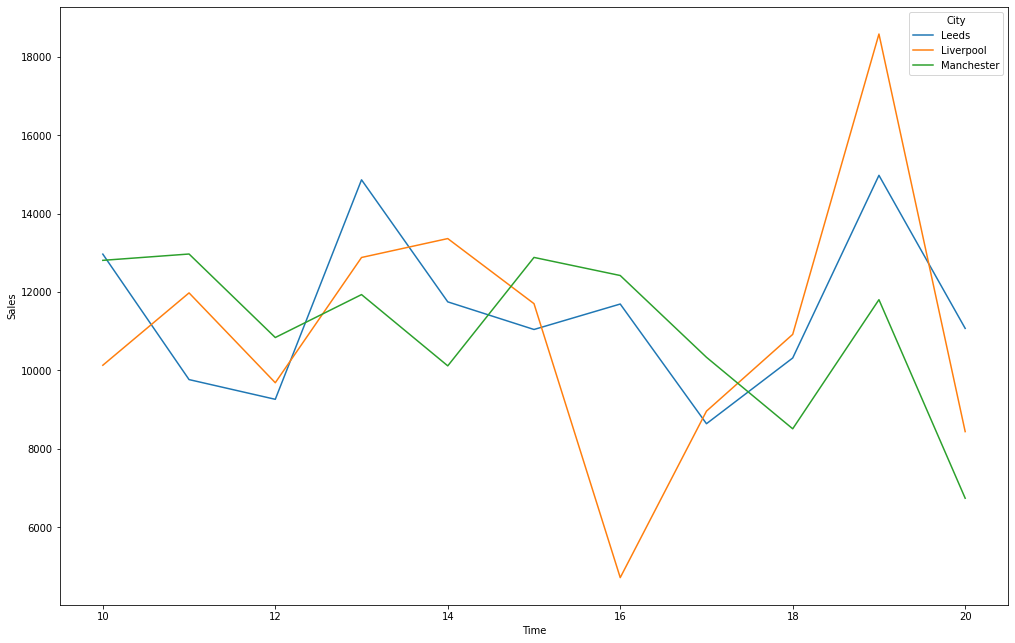

In [13]:
Time_Sales =df.groupby(['City','Time']).agg(Sales =("Total",'sum'))
Time_Sales = Time_Sales.reset_index()
%matplotlib inline
plt.figure(figsize=(17, 11))


sns.lineplot(x="Time",
           y="Sales", 
           hue='City',
           data=Time_Sales)


<AxesSubplot:xlabel='City', ylabel='Customer_Satisfaction'>

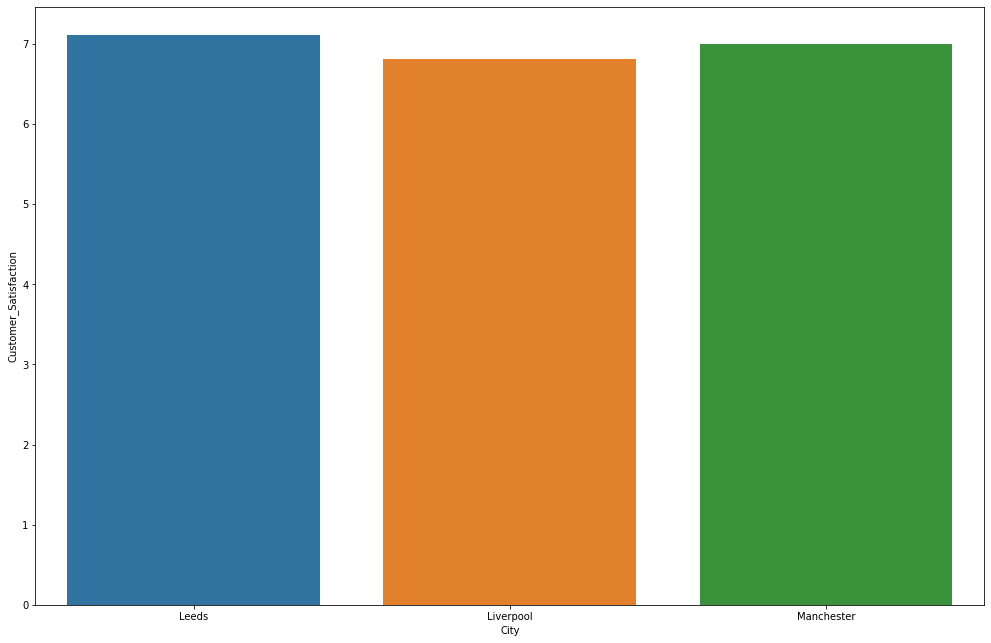

In [14]:
City_Satisfaction =df.groupby('City').agg(Customer_Satisfaction =("Customer Satisfaction",'mean'))
City_Satisfaction = City_Satisfaction.reset_index()
%matplotlib inline
plt.figure(figsize=(17, 11))

sns.barplot(x="City",
           y="Customer_Satisfaction", 
           data=City_Satisfaction)

<AxesSubplot:xlabel='City', ylabel='Customer_Satisfaction'>

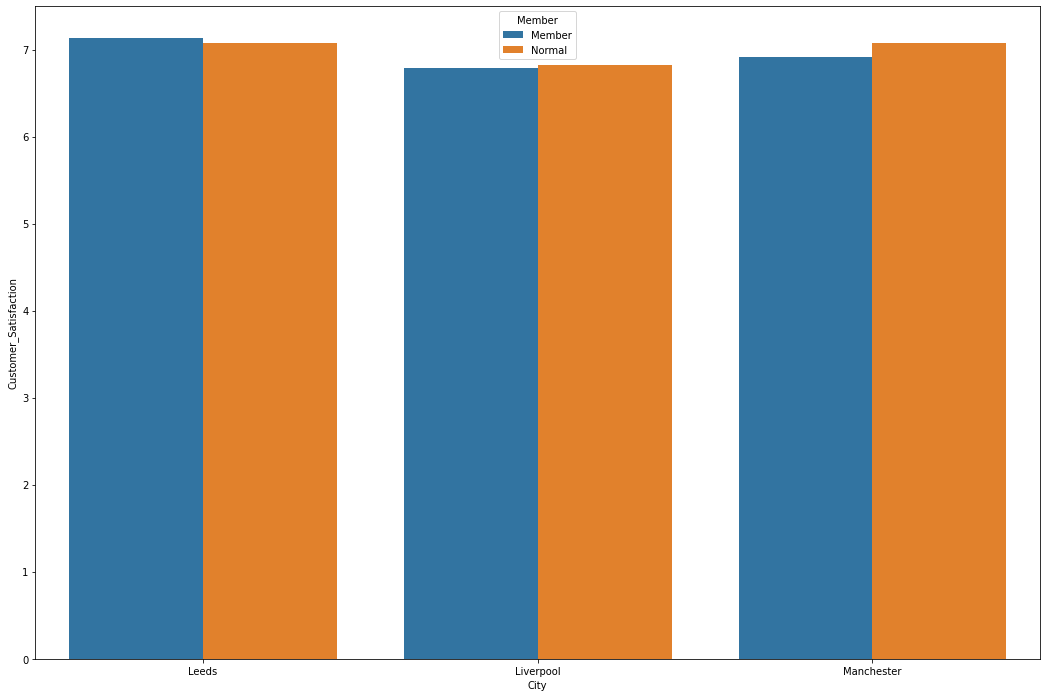

In [49]:
City_Member_Satisfaction =df.groupby(['City','Member']).agg(Customer_Satisfaction =("Customer Satisfaction",'mean'))
City_Member_Satisfaction = City_Member_Satisfaction.reset_index()
%matplotlib inline
plt.figure(figsize=(18, 12))
#sns.set(font_scale=1)

sns.barplot(x="City",
           y="Customer_Satisfaction", 
           hue='Member',
           data=City_Member_Satisfaction)


<AxesSubplot:xlabel='Date', ylabel='Sales'>

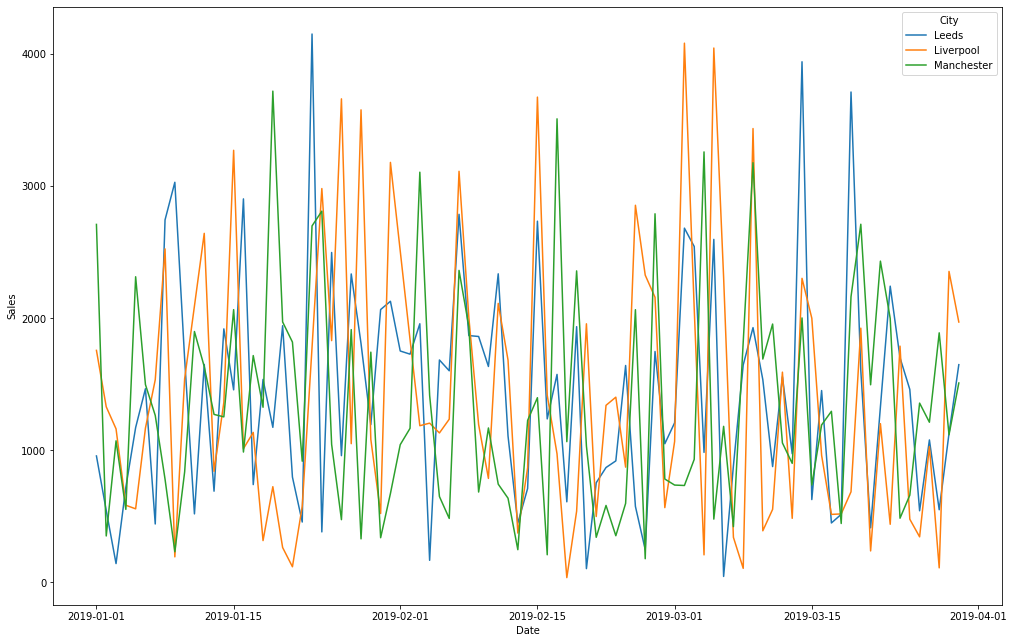

In [43]:
City_All_Time_Sales =df.groupby(['City','Date']).agg(Sales =("Total",'sum'))
City_All_Time_Sales = City_All_Time_Sales.reset_index()
%matplotlib inline
plt.figure(figsize=(17, 11))


sns.lineplot(x="Date",
           y="Sales", 
           hue='City',
           data=City_All_Time_Sales)


In [44]:
Product_under_50 =df.groupby('Unit price').agg(Sales =("Total",'sum'))
Product_under_50 = Product_under_50.reset_index()

Product_under_50




,Unit price,Sales
0,10.08,84.672
1,10.13,85.092
2,10.16,60.960
3,10.17,12.204
4,10.18,97.728
...,...,...
938,99.82,1317.624
939,99.83,718.776
940,99.89,239.736
941,99.92,719.424


In [60]:
Date_Sale =df.groupby('Date').agg(Sales =("Total",'sum'))

In [65]:
Date_Sale.sort_values('Sales',inplace=True,ascending=False)
Date_Sale.head(10)

,Sales
Date,
2019-03-09,8541.768
2019-02-07,8260.812
2019-03-14,8245.296
2019-02-15,7806.612
2019-03-02,7497.492
2019-03-05,7121.004
2019-01-23,6850.500
2019-01-15,6793.440
2019-02-27,6696.516


In [72]:
Quantity_Product =df.groupby(['City','Product Category']).agg(Sales =("Quantity",'sum'))
Quantity_Product


Sales
City       Product Category             
Leeds      Electronic accessories    333
           Fashion accessories       342
           Food and beverages        369
           Health and beauty         277
           Home and lifestyle        245
           Sports and travel         265
Liverpool  Electronic accessories    316
           Fashion accessories       297
           Food and beverages        270
           Health and beauty         320
           Home and lifestyle        295
           Sports and travel         322
Manchester Electronic accessories    322
           Fashion accessories       263
           Food and beverages        313
           Health and beauty         257
           Home and lifestyle        371
           Sports and travel         333